# Sky Map

In [178]:
# Imports
import math
import matplotlib.pyplot as plt
import pandas as pd
import re

In [179]:
# Read data file
df = pd.read_csv("Data/bsc5.csv")
df

,HR,Name,DM,HD,SAO,FK5,IRflag,r_IRflag,Multiple,ADS,...,RadVel,n_RadVel,l_RotVel,RotVel,u_RotVel,Dmag,Sep,MultID,MultCnt,NoteFlag
0,1,NaN,BD+44 4550,3.0,36042.0,NaN,NaN,NaN,NaN,46.0,...,-18.0,NaN,NaN,195.0,NaN,4.2,21.6,AC,3.0,NaN
1,2,NaN,BD-01 4525,6.0,128569.0,NaN,NaN,NaN,NaN,NaN,...,14.0,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,33 Psc,BD-06 6357,28.0,128572.0,1002.0,I,NaN,NaN,NaN,...,-6.0,SB1O,<,17.0,NaN,2.5,0.0,NaN,3.0,*
3,4,86 Peg,BD+12 5063,87.0,91701.0,2004.0,NaN,NaN,NaN,NaN,...,-2.0,V?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,BD+57 2865,123.0,21085.0,NaN,NaN,NaN,NaN,61.0,...,-12.0,V,NaN,NaN,NaN,0.8,1.4,NaN,NaN,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9105,9106,NaN,CP-73 2346,225233.0,255629.0,NaN,NaN,NaN,NaN,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9106,9107,NaN,BD+33 4828,225239.0,53622.0,2002.0,NaN,NaN,NaN,NaN,...,4.0,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9107,9108,NaN,CP-72 2800,225253.0,255631.0,1001.0,NaN,NaN,NaN,NaN,...,-3.0,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9108,9109,NaN,BD+25 5068,225276.0,73731.0,NaN,I,NaN,NaN,42.0,...,-5.0,NaN,NaN,NaN,NaN,4.5,17.5,NaN,NaN,NaN


In [180]:
# Convert RA to numbers and drop all NaN values
df['RAh'] = pd.to_numeric(df['RAh'], errors='coerce').dropna()
df['RAm'] = pd.to_numeric(df['RAm'], errors='coerce').dropna()
df['RAs'] = pd.to_numeric(df['RAs'], errors='coerce').dropna()

In [181]:
# Convert DE to numbers and drop all NaN values
df['DEd'] = pd.to_numeric(df['DEd'], errors='coerce').dropna()
df['DEm'] = pd.to_numeric(df['DEm'], errors='coerce').dropna()
df['DEs'] = pd.to_numeric(df['DEs'], errors='coerce').dropna()
df = df.dropna(subset=['DE'])

In [182]:
# Reset the indices for everything in the DataFrame so we don't get indexing errors later
df = df.reset_index()

In [183]:
# Append RA to a list for coordinates
RA = []
for i in range(len(df['RAh'])):
    RA.append(15 * (df['RAh'][i] + (df['RAm'][i] / 60) + (df['RAs'][i] / 3600)))

In [184]:
# Make a list of the DE signs
DE_signs = []
for i in df['DE']:
    DE_signs.append(i)

# Append DE to a list for coordinates
DE = []
for i in range(len(df['DE'])):
    DE.append(df['DEd'][i] + df['DEm'][i] / 60 + df['DEs'][i] / 3600)

# Get all the signs for DE right
for i in range(len(DE_signs)):
    DE[i] *= float(re.sub(r'\\n[0-9]?', '', str(DE_signs[i])) + "1")

In [185]:
# Convert Galactic Longitude and Galactic Latitude to numbers and drop all NaN values
df['GLON'] = pd.to_numeric(df['GLON'], errors='coerce').dropna()
df['GLAT'] = pd.to_numeric(df['GLAT'], errors='coerce').dropna()

In [186]:
# Make a list for the coordinates for each
long = []
for num in df['GLON']:
    long.append(num)
    
lat = []
for num in df['GLAT']:
    lat.append(num)

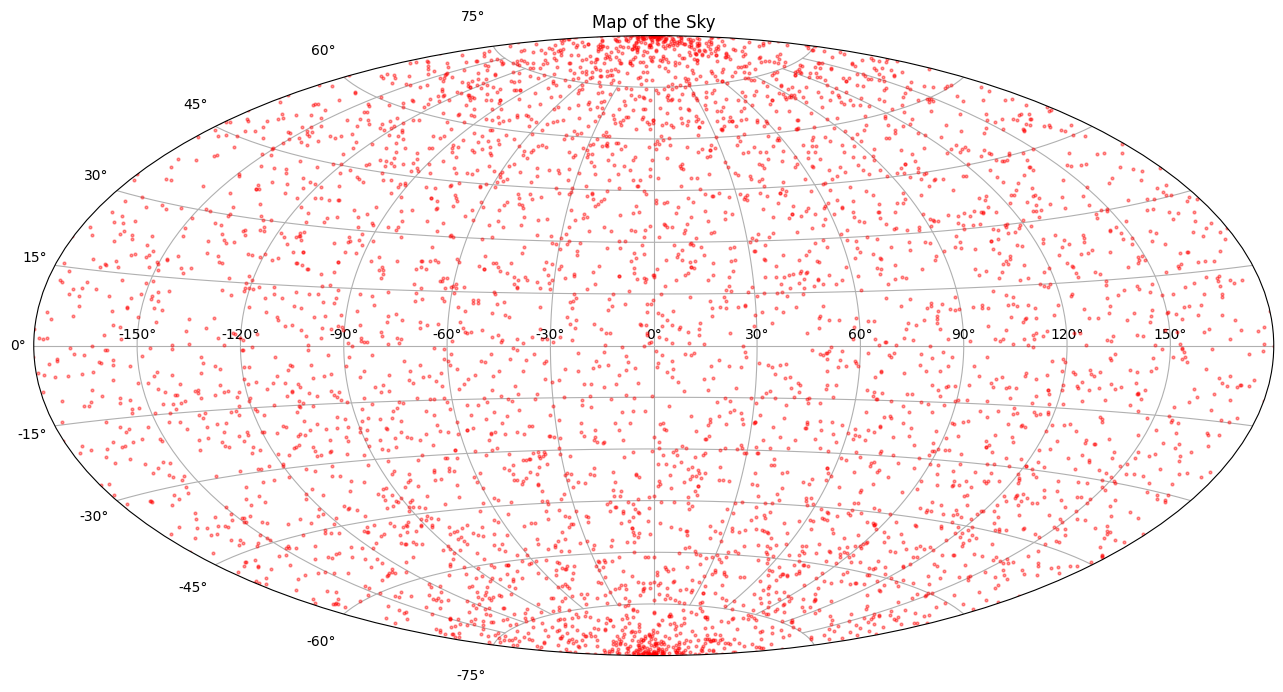

In [187]:
# Plot the equatorial coordinates
plt.figure(figsize = (16, 8.4))
plt.subplot(projection = "aitoff")
plt.title("Map of the Sky")
plt.plot(RA, DE, 'o', markersize = 2, alpha = 0.4, color = 'r')
plt.grid(True)
plt.show()

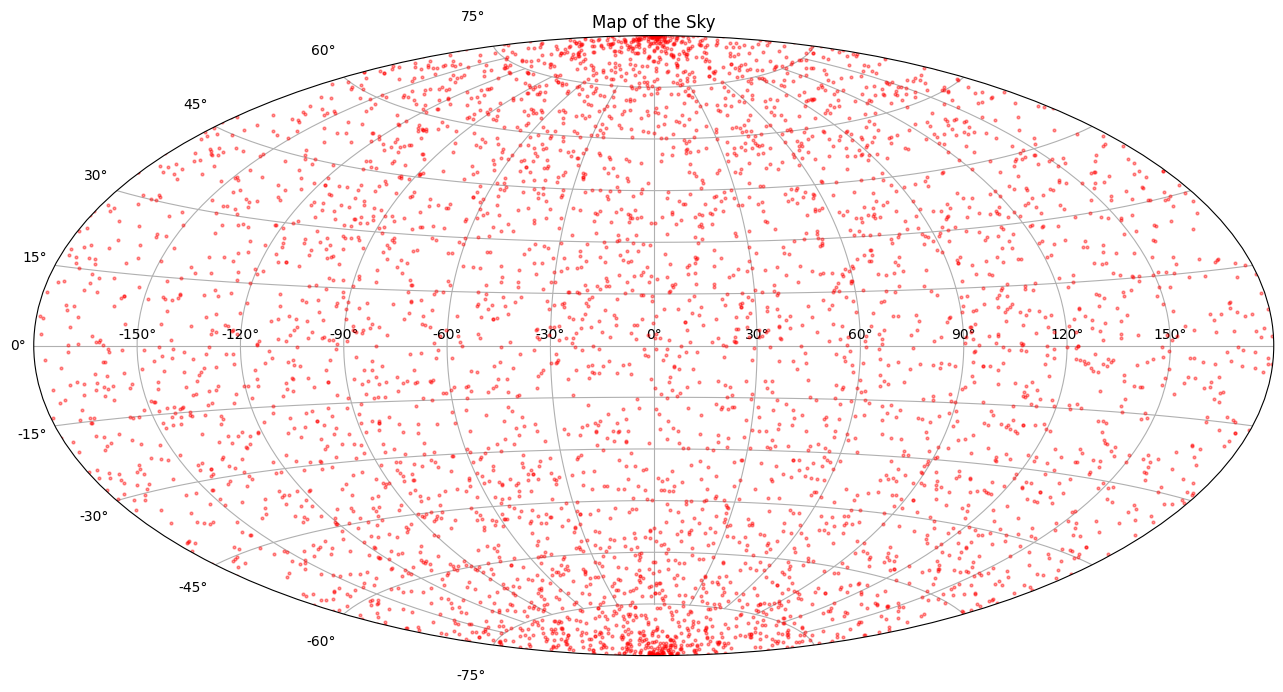

In [188]:
# Plot the galactic coordinates
plt.figure(figsize = (16, 8.4))
plt.subplot(projection = "aitoff")
plt.title("Map of the Sky")
plt.plot(long, lat, 'o', markersize = 2, alpha = 0.4, color = 'r')
plt.grid(True)
plt.show()